# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | castelnovo ne'monti
Processing Record 2 of Set 1 | bloemhof
Processing Record 3 of Set 1 | minas de marcona
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | alofi
Processing Record 6 of Set 1 | afaahiti
Processing Record 7 of Set 1 | shevchenko
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | ceuta
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | labytnangi
Processing Record 13 of Set 1 | dudinka
Processing Record 14 of Set 1 | dryden
Processing Record 15 of Set 1 | floro
Processing Record 16 of Set 1 | stanley
Processing Record 17 of Set 1 | anadyr
Processing Record 18 of Set 1 | rawson
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | fale old settlement
Processing Record 21 of Set 1 | lihue
Processing Record 22 of Set 1 | banda aceh
Processing Recor

Processing Record 38 of Set 4 | papao
Processing Record 39 of Set 4 | broome
Processing Record 40 of Set 4 | puerto ayora
Processing Record 41 of Set 4 | inekar
City not found. Skipping...
Processing Record 42 of Set 4 | chonchi
Processing Record 43 of Set 4 | qusmuryn
Processing Record 44 of Set 4 | harper
Processing Record 45 of Set 4 | lusambo
Processing Record 46 of Set 4 | wewak
Processing Record 47 of Set 4 | sinop
Processing Record 48 of Set 4 | ahau
City not found. Skipping...
Processing Record 49 of Set 4 | rialma
Processing Record 0 of Set 5 | dunedin
Processing Record 1 of Set 5 | hoxtolgay
City not found. Skipping...
Processing Record 2 of Set 5 | xiahu
Processing Record 3 of Set 5 | kailua-kona
Processing Record 4 of Set 5 | pierre
Processing Record 5 of Set 5 | veraval
Processing Record 6 of Set 5 | kataragama
City not found. Skipping...
Processing Record 7 of Set 5 | castanos
Processing Record 8 of Set 5 | utrik
Processing Record 9 of Set 5 | ingeniero jacobacci
Processi

Processing Record 30 of Set 8 | yen vinh
Processing Record 31 of Set 8 | ciudad lazaro cardenas
Processing Record 32 of Set 8 | cabedelo
Processing Record 33 of Set 8 | howard springs
Processing Record 34 of Set 8 | puerto quijarro
Processing Record 35 of Set 8 | mozarlandia
Processing Record 36 of Set 8 | yung shue wan
Processing Record 37 of Set 8 | al qubbah
Processing Record 38 of Set 8 | yangshuo
Processing Record 39 of Set 8 | san fernando
Processing Record 40 of Set 8 | barcelos
Processing Record 41 of Set 8 | dangriga
Processing Record 42 of Set 8 | miracema do tocantins
Processing Record 43 of Set 8 | saratamata
City not found. Skipping...
Processing Record 44 of Set 8 | vilyuysk
Processing Record 45 of Set 8 | ryazhsk
Processing Record 46 of Set 8 | duncan town
City not found. Skipping...
Processing Record 47 of Set 8 | sisimiut
Processing Record 48 of Set 8 | la gi
Processing Record 49 of Set 8 | mossel bay
Processing Record 0 of Set 9 | chippewa falls
Processing Record 1 of

City not found. Skipping...
Processing Record 12 of Set 12 | kirensk
Processing Record 13 of Set 12 | n'dalatando
Processing Record 14 of Set 12 | colonia
Processing Record 15 of Set 12 | higuera de zaragoza
Processing Record 16 of Set 12 | coahuayana de hidalgo
Processing Record 17 of Set 12 | midvagur
Processing Record 18 of Set 12 | santa terezinha
Processing Record 19 of Set 12 | prince edward
Processing Record 20 of Set 12 | ola
Processing Record 21 of Set 12 | santyoku
Processing Record 22 of Set 12 | bhamo
Processing Record 23 of Set 12 | tevragh zeina
City not found. Skipping...
Processing Record 24 of Set 12 | mormugao
Processing Record 25 of Set 12 | gokwe
Processing Record 26 of Set 12 | kindu
Processing Record 27 of Set 12 | uyskoye
Processing Record 28 of Set 12 | odense
Processing Record 29 of Set 12 | ternate
Processing Record 30 of Set 12 | emsburen
Processing Record 31 of Set 12 | magnitogorsk
Processing Record 32 of Set 12 | awjilah
Processing Record 33 of Set 12 | po

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,castelnovo ne'monti,44.4356,10.4033,9.02,87,11,0.62,IT,1699835628
1,bloemhof,-27.6469,25.6070,18.58,32,2,3.22,ZA,1699835628
2,minas de marcona,-15.2119,-75.1103,14.62,91,90,6.45,PE,1699835628
3,bethel,41.3712,-73.4140,2.93,72,0,1.54,US,1699835562
4,alofi,-19.0595,-169.9187,25.94,73,100,6.69,NU,1699835628


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,castelnovo ne'monti,44.4356,10.4033,9.02,87,11,0.62,IT,1699835628
1,bloemhof,-27.6469,25.6070,18.58,32,2,3.22,ZA,1699835628
2,minas de marcona,-15.2119,-75.1103,14.62,91,90,6.45,PE,1699835628
3,bethel,41.3712,-73.4140,2.93,72,0,1.54,US,1699835562
4,alofi,-19.0595,-169.9187,25.94,73,100,6.69,NU,1699835628


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

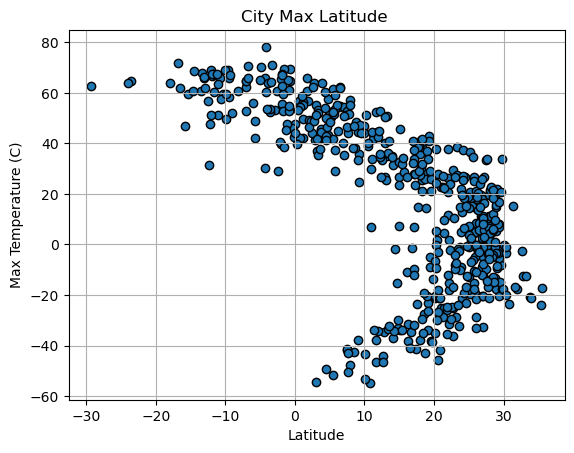

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude ")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

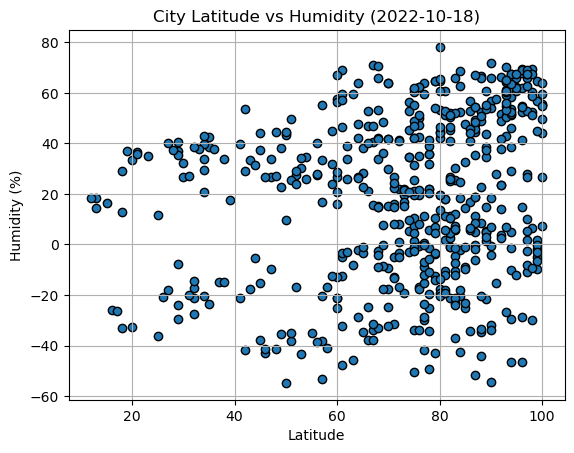

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

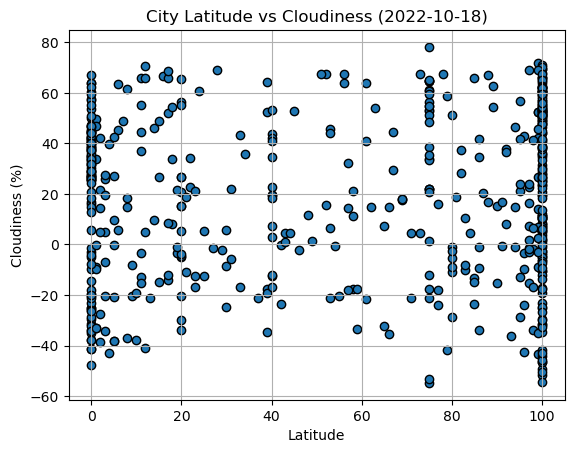

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

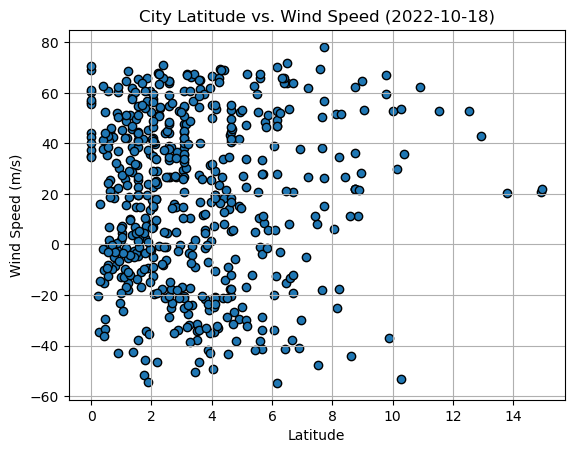

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"], edgecolors="Black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y = {slope: .2f}x + {intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,castelnovo ne'monti,44.4356,10.4033,9.02,87,11,0.62,IT,1699835628
3,bethel,41.3712,-73.4140,2.93,72,0,1.54,US,1699835562
6,shevchenko,48.5000,35.0000,8.73,69,100,5.78,UA,1699835629
8,ceuta,35.8903,-5.3075,18.02,78,34,1.94,ES,1699835629
9,jamestown,42.0970,-79.2353,3.80,68,0,3.09,US,1699834992


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bloemhof,-27.6469,25.6070,18.58,32,2,3.22,ZA,1699835628
2,minas de marcona,-15.2119,-75.1103,14.62,91,90,6.45,PE,1699835628
4,alofi,-19.0595,-169.9187,25.94,73,100,6.69,NU,1699835628
5,afaahiti,-17.7500,-149.2833,28.93,80,58,4.61,PF,1699835628
7,port-aux-francais,-49.3500,70.2167,4.47,78,100,4.04,TF,1699835629


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8686022627191711


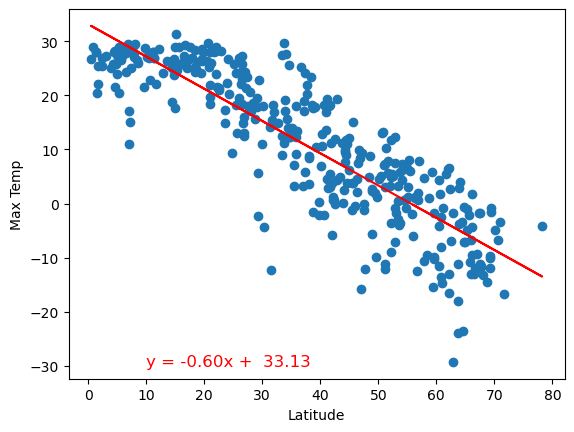

In [16]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), 
              northern_hemi_df["Max Temp"], (10, -30))

The r-value is: 0.6931236619390064


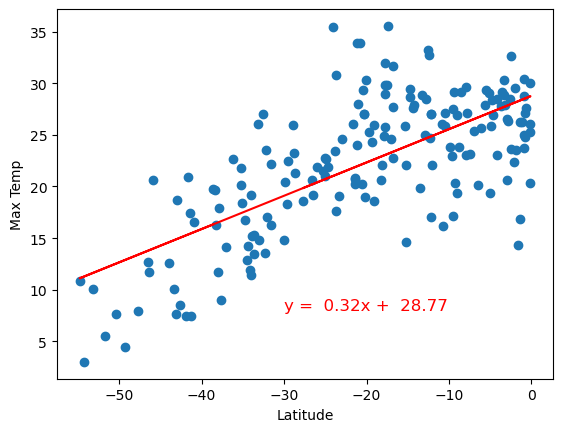

In [17]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"),
               southern_hemi_df["Max Temp"], (-30, 8)) 

**Discussion about the linear relationship:** 

There is a strong negative correlation between the temperature and latitude in the Northern Hemisphere with a correlation coefficient of -0.8686022627191711. 

There is a decently strong positive correlation between the temperature and latitude in the Southern Hemisphere with a correlation coefficient of 0.6931236619390064 though it is not as strong as the Northern Hemisphere based on this data.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.19075025782238772


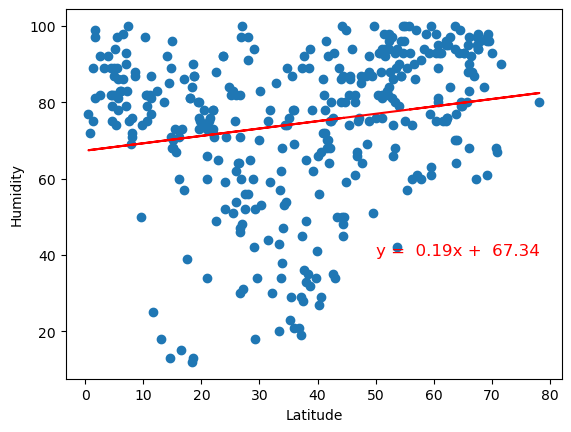

In [22]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), 
               northern_hemi_df["Humidity"], (50, 40))

The r-value is: 0.22126991627502174


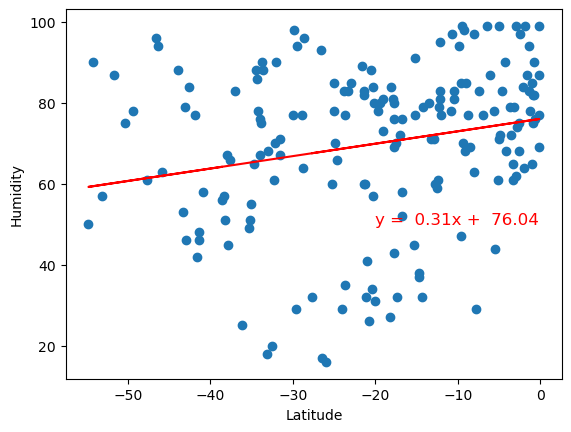

In [24]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"),
              southern_hemi_df["Humidity"], (-20, 50))

**Discussion about the linear relationship:** 

The correlation between humidity and latitude in the Northern and Southern hemisphere have a weak positive correlation.

The Northern Hemisphere's correlation coefficient is 0.19075025782238772

The Southern Hemisphere's correlation coefficient is 0.22126991627502174

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.060289411168903434


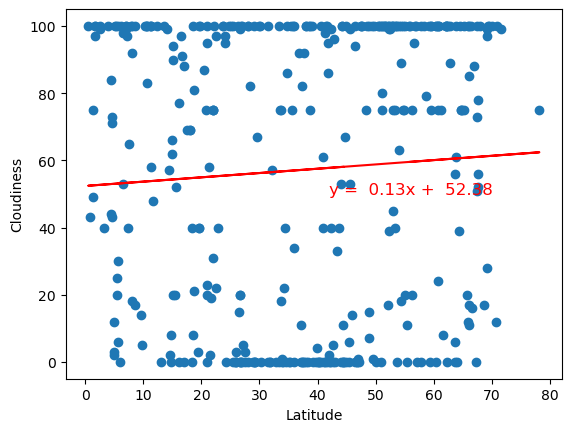

In [25]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"),
              northern_hemi_df["Cloudiness"], (42, 50))

The r-value is: 0.022598654024308718


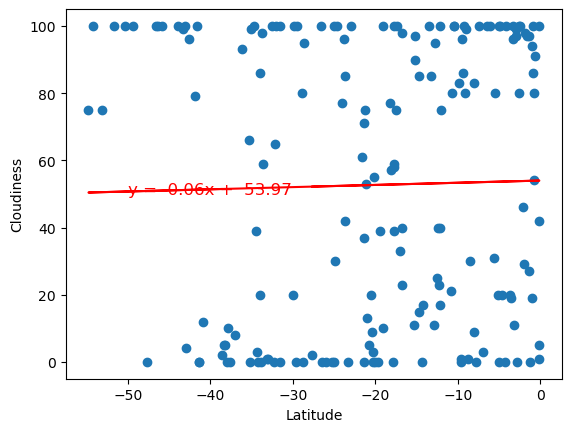

In [26]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), 
               southern_hemi_df["Cloudiness"], (-50, 50))

**Discussion about the linear relationship:** 

There is a weak positive correlation between cloudiness and latitude in both the Northern and Southern Hemisphere.

The Northern Hemisphere has a correlation coefficient of 0.060289411168903434

The Southern Hemisphere has a correlation coefficient of 0.022598654024308718

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0522637956710902


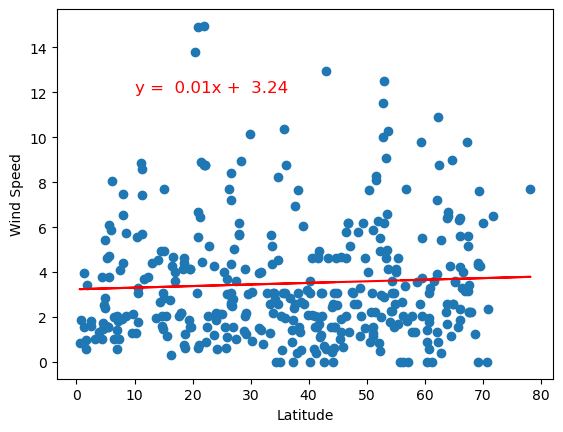

In [27]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), 
               northern_hemi_df["Wind Speed"], (10, 12))

The r-value is: -0.346435524795686


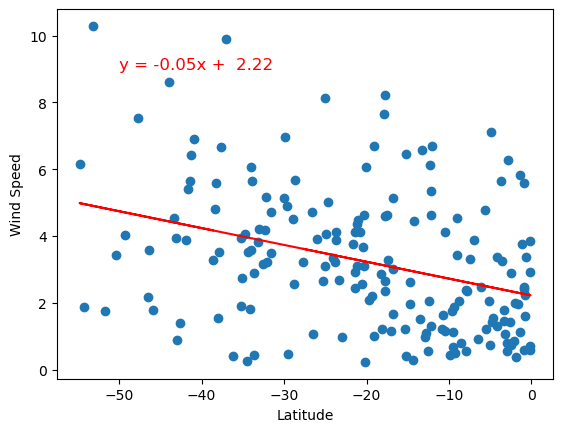

In [28]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), 
               southern_hemi_df["Wind Speed"], (-50, 9))

**Discussion about the linear relationship:** 

There is no real correlation between wind speed and latitude for the Northern Hemisphere. There is a weak negative correlation between wind speed and latitude in the Southern Hemisphere.

The Northern Hemisphere has a correlation coefficient of 0.0522637956710902

The Southern Hemisphere has a correlation coefficient of -0.346435524795686